<a href="https://colab.research.google.com/github/karlasov/RedesNeurolanes/blob/main/ProyectoAprendizajeProfundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto de Aprendizaje Profundo**</br>
TC2035 Diseño de Redes Neuronales y Aprendizaje Profundo</br>
Karla Susana Olvera Vazquez </br>


## Setup

In [ ]:
!pip install psutil
!pip install GPUtil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=3a1ee65fa096d28554ceb6d9435c40eaac83ee36386b70d9a671e6f2aae5f382
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


In [ ]:
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection

from scipy.ndimage import shift

# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.model_selection import train_test_split
import keras
from keras import layers
from keras import regularizers
from keras.models import Model
from keras.models import load_model
from keras.layers import Input
from keras.layers import LeakyReLU
from keras.utils import plot_model
#from keras.layers import 
from keras.layers import BatchNormalization
from keras.initializers import he_normal
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from matplotlib import pyplot

import numpy as np

import time
import psutil
import GPUtil

# Modelo 1 CNN

**Ultima Modificación:** 2022/10/20<br>
**Descripción:** Red Convolucional que clasifica el dataset  keras.fashion_mnist con una exactitud del 92%

## Preparación de datos

In [ ]:
data_mnist = keras.datasets.fashion_mnist

In [ ]:
# mapea etiqueta a nombre
dicc = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat", 
        5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}
dicc

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

4422102/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Construcción del Modelo

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),  
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_initializer='he_uniform', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_initializer='he_uniform', padding='same'),  
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_initializer='he_uniform', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

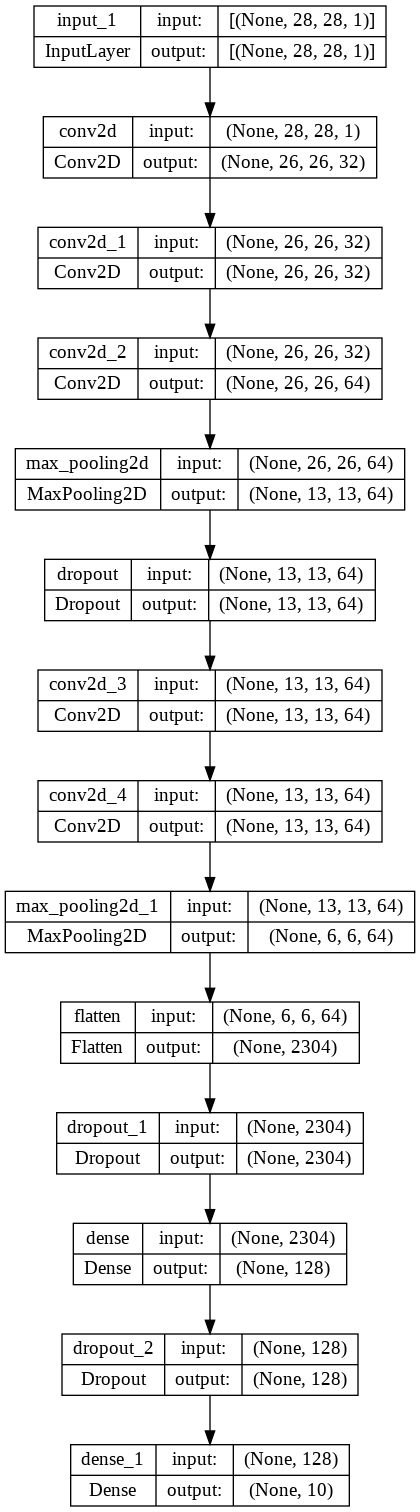

In [ ]:
plot_model(model, 'cnn.png', show_shapes=True)

## Entrenamiento del Modelo

In [ ]:
batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time.time()
Historia=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
stop = time.time()

TrainingTimeNN= (stop - start)
print(f"Training time: {stop - start}s")

Epoch 1/20
375/375 [==============================] - 17s 17ms/step - loss: 0.6723 - accuracy: 0.7587 - val_loss: 0.3693 - val_accuracy: 0.8639
Epoch 2/20
375/375 [==============================] - 7s 19ms/step - loss: 0.3982 - accuracy: 0.8561 - val_loss: 0.2942 - val_accuracy: 0.8916
Epoch 3/20
375/375 [==============================] - 6s 15ms/step - loss: 0.3347 - accuracy: 0.8797 - val_loss: 0.2539 - val_accuracy: 0.9066
Epoch 4/20
375/375 [==============================] - 6s 16ms/step - loss: 0.2982 - accuracy: 0.8933 - val_loss: 0.2359 - val_accuracy: 0.9161
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - loss: 0.2750 - accuracy: 0.9016 - val_loss: 0.2280 - val_accuracy: 0.9172
Epoch 6/20
375/375 [==============================] - 6s 16ms/step - loss: 0.2589 - accuracy: 0.9067 - val_loss: 0.2159 - val_accuracy: 0.9238
Epoch 7/20
375/375 [==============================] - 6s 15ms/step - loss: 0.2448 - accuracy: 0.9116 - val_loss: 0.2053 - val_accuracy: 0.924

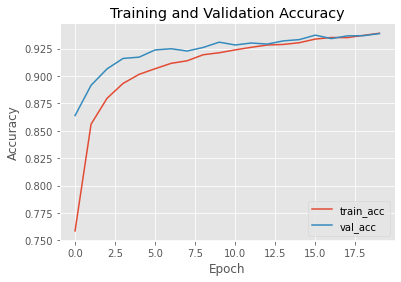

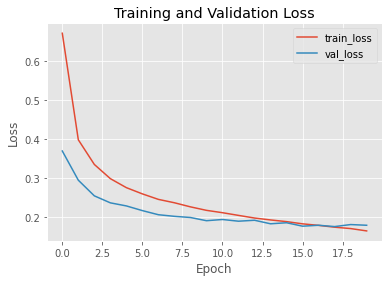

In [ ]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()
plt.plot(np.arange(0,epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
print(psutil.cpu_percent())
print(psutil.virtual_memory().percent)
# Testing the GPUtil library for both GPU performance details
GPUtil.showUtilization()

46.3
22.2
| ID | GPU | MEM |
------------------
|  0 |  0% | 13% |


## Evaluación del Modelo

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.19403283298015594
Test accuracy: 0.9315999746322632


#Autoencoder + MLP
**Ultima Modificación:** 2022/10/20<br>
**Descripción:** Autoencoder para feature selection y MLP para clasificación del dataset keras.fashion_mnist


## Autoencoder for Feature Extraction

###Preparación de Datos

In [ ]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

4422102/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


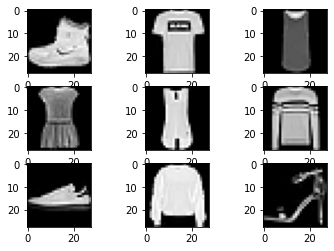

In [ ]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [ ]:
# convert from integers to floats
# normalize to range 0-1
x_train = trainX.astype('float32') / 255.0
x_test = testX.astype('float32') / 255.0

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


###Construcción del Modelo

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# This is our input image
input_img = keras.Input(shape=(784,))

In [ ]:
# define encoder
visible = Input(shape=(784,))
# encoder level 1
e = layers.Dense(encoding_dim, activation='relu')(input_img)
#e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
#e = layers.Dense(encoding_dim, activation='relu')(input_img)
e= layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = encoding_dim
bottleneck = Dense(n_bottleneck)(e)

In [ ]:
# define decoder, level 1
#d = Dense(n_inputs)(bottleneck)
d = layers.Dense(784, activation='sigmoid')(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = layers.Dense(784*2, activation='sigmoid')(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(784, activation='linear')(d)
# define autoencoder model
model = Model(input_img, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1568)              51744     
                                                             

In [ ]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

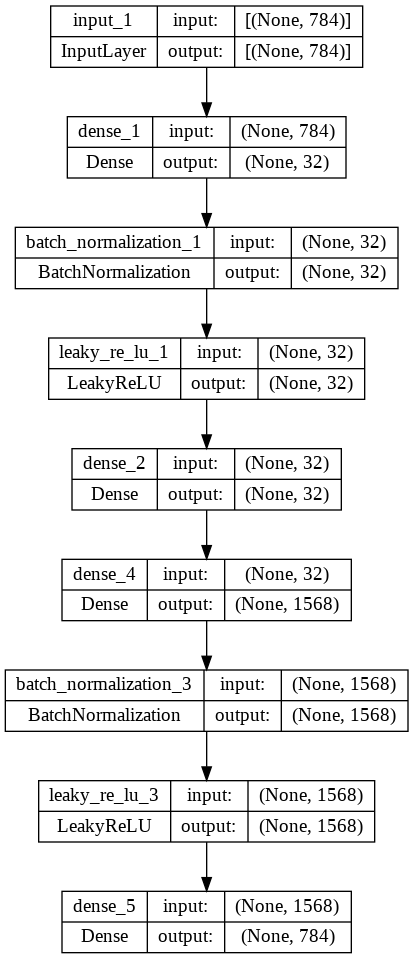

In [ ]:
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

###Entrenamiento del Modelo

In [ ]:
# fit the autoencoder model to reconstruct input

start = time.time()
history = model.fit(x_train, x_train, epochs=200, batch_size=16, verbose=2, validation_data=(x_test,x_test))
stop = time.time()

TrainingTimeAE= (stop - start)
print(f"Training time: {stop - start}s")

Epoch 1/200
3750/3750 - 13s - loss: 0.0300 - val_loss: 0.0299 - 13s/epoch - 4ms/step
Epoch 2/200
3750/3750 - 10s - loss: 0.0234 - val_loss: 0.0282 - 10s/epoch - 3ms/step
Epoch 3/200
3750/3750 - 10s - loss: 0.0218 - val_loss: 0.0358 - 10s/epoch - 3ms/step
Epoch 4/200
3750/3750 - 10s - loss: 0.0210 - val_loss: 0.0509 - 10s/epoch - 3ms/step
Epoch 5/200
3750/3750 - 10s - loss: 0.0203 - val_loss: 0.0432 - 10s/epoch - 3ms/step
Epoch 6/200
3750/3750 - 10s - loss: 0.0199 - val_loss: 0.0459 - 10s/epoch - 3ms/step
Epoch 7/200
3750/3750 - 10s - loss: 0.0196 - val_loss: 0.0539 - 10s/epoch - 3ms/step
Epoch 8/200
3750/3750 - 10s - loss: 0.0194 - val_loss: 0.0530 - 10s/epoch - 3ms/step
Epoch 9/200
3750/3750 - 11s - loss: 0.0192 - val_loss: 0.0551 - 11s/epoch - 3ms/step
Epoch 10/200
3750/3750 - 10s - loss: 0.0191 - val_loss: 0.0848 - 10s/epoch - 3ms/step
Epoch 11/200
3750/3750 - 10s - loss: 0.0190 - val_loss: 0.0437 - 10s/epoch - 3ms/step
Epoch 12/200
3750/3750 - 10s - loss: 0.0188 - val_loss: 0.0460 

In [ ]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
print(psutil.cpu_percent())
print(psutil.virtual_memory().percent)
# Testing the GPUtil library for both GPU performance details
GPUtil.showUtilization()

In [ ]:
# definir encoder
encoder = Model(input_img,bottleneck)

plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

##Classification with MLP 

###Preparación de Datos

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# convert from integers to floats
# normalize to range 0-1
x_train = trainX.astype('float32') / 255.0
x_test = testX.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# load the model from file
encoder = load_model('encoder.h5', compile=False)

In [ ]:
# encode the train data
X_train_encode = encoder.predict(x_train)
# encode the test data
X_test_encode = encoder.predict(x_test)

###Construcción del Modelo

In [ ]:
model_classification = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,)),
    keras.layers.Dense(512, activation='relu', kernel_initializer=he_normal),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
model_classification.summary()

In [ ]:
plot_model(model, 'mlp.png', show_shapes=True)

###Entrenamiento del Modelo

In [ ]:
batch_size = 128
epochs = 50

model_classification.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
start = time.time()
Historia2=model_classification.fit(X_train_encode, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
stop = time.time()

TrainingTimeMLP= (stop - start)
print(f"Training time: {stop - start}s")

In [ ]:
# Despliega las curvas de aprendizaje
H = Historia2
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()
plt.plot(np.arange(0,epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
print(psutil.cpu_percent())
print(psutil.virtual_memory().percent)
# Testing the GPUtil library for both GPU performance details
GPUtil.showUtilization()

###Evalueación del Modelo

In [ ]:
score = model_classification.evaluate(X_test_encode, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])